# Experiments

This experiment guide includes nine experiments, introducing basic equipment operation and
Configuration, TensorFlow's helloworld, sessions, matrix multiplication, TensorFlow
Virtualization, and housing price prediction.

- Experiment 1: "Hello, TensorFlow".
- Experiment 2: Understand functions of sessions through a session experiment using the with session function.
- Experiment 3: Understand matrix multiplication by multiplying two matrices with ranks of tensors greater than 2.
- Experiment 4: Understand the definition of variables.
  - Define variables with Variable and get_variable respectively and observe the difference between these two methods.
- Experiment 5: Understand the visualization of TensorBoard.
  - TensorBoard aggregates all kinds of data into a log file.
  - You can enable TensorBoard service to read the log file and enable the 6060 port to provide web services so that users can view data via a browser.
- Experiment 6: Understand data reading and processing by reading .csv files and displaying them based on given conditions.
- Experiment 7: Understand graphic operations.
  - Create a graph in three ways and set it as the default graph. Use the get_default_graph() function to access the default graph and verify its settings.
- Experiment 8: Understand save and use of models.
  - After importing data, analyze data characteristics and define variables based on the characteristics.
  - Create a model and define output nodes.
  - Build the structure for forward propagation and then the structure for backpropagation.
  - Compile and train the model to get appropriate parameters.
  - After training data and testing the model, create a saver and a path to save parameters in the session automatically.
  - When the model is saved, you can access the model for use.
- Experiment 9: A comprehensive experiment of forecasting housing price through the instantiation of linear regression.
  - Use the dataset of housing prices in Beijing and skills in the prior eight experiments to forecast the housing price.

## Experiment 1

In [1]:
import tensorflow as tf

In [2]:
# Defining a variable
hello = tf.constant("hello, tensorflow!")  # a constant

In [3]:
sess = tf.Session()  # Creates a session
print(sess.run(hello))  # Run the session on the `hello` constant to get the result

b'hello, tensorflow!'


In [4]:
sess.close()  # Close the session

## Experiment 2
- After this experiment you will understand the definition of sessions and how to use them with the python context manager (`with`).

In [5]:
import tensorflow as tf

In [6]:
# Defining constants
a = tf.constant(3)
b = tf.constant(4)

In [7]:
# Creating a Session
with tf.Session() as sess:  # `with` starts a context where Session will be automatically closed
    print(f"Add: {sess.run(a + b)}")
    print(f"Multiply: {sess.run(a * b)}")

Add: 7
Multiply: 12


## Experiment 3
- After this experiment you will understand the "tensor" part of TensorFlow and how to use TensorFlow to multiply matrices.

In [8]:
import tensorflow as tf

In [9]:
# Start a TF default session
sess = tf.InteractiveSession()

In [10]:
# Creates two matrix variables
w1 = tf.Variable(tf.random_normal(shape=[2, 3], mean=1.0, stddev=1.0))
w2 = tf.Variable(tf.random_normal(shape=[3, 1], mean=1.0, stddev=1.0))

In [11]:
# Defining a constant matrix
x = tf.constant([[0.7, 0.9]])

In [12]:
# Initializing global variables: w1, w2
tf.global_variables_initializer().run()

In [13]:
# Multiply matrices
a = tf.matmul(x, w1)
b = tf.matmul(a, w2)
print(b.eval())  # Evaluates tensor `b` in the session

[[-0.5737703]]


## Experiment 4
- After this experiment you will understand `tf.Variable` and the `get_variable` function.

In [14]:
import tensorflow as tf

In [15]:
# Clears the default graph stack and resets the global default graph.
tf.reset_default_graph()

In [16]:
var1 = tf.Variable(10.0, name="varname")
var2 = tf.Variable(11.0, name="varname")
var3 = tf.Variable(12.0)
var4 = tf.Variable(13.0)

In [17]:
# Variable scope allows you to create new variables and to share already created ones 
# while providing checks to not create or share by accident.
# TODO: make it more clear
with tf.variable_scope("test1"):
    var5 = tf.get_variable("varname", shape=[2], dtype=tf.float32)

with tf.variable_scope("test2"):
    var6 = tf.get_variable("varname", shape=[2], dtype=tf.float32)

In [18]:
print("var1: ", var1.name)
print(
    "var2: ", var2.name
)  # A tf variable with a existing name gets a suffix to differentiate between them
print("var3: ", var3.name)
print("var4: ", var4.name)
print(
    "var5: ", var5.name
)  # With `variable_scope` we can enclose a variable within a desired scope
print("var6: ", var6.name)

var1:  varname:0
var2:  varname_1:0
var3:  Variable:0
var4:  Variable_1:0
var5:  test1/varname:0
var6:  test2/varname:0


## Experiment 5
- After this experiment you will understand the virtualization tool TensorBoard.

In [72]:
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    ma = [val if idx < w else sum(a[(idx - w):idx]) / w for idx, val in enumerate(a)]
    return ma

In [74]:
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.3  # y = 2 * x + noise

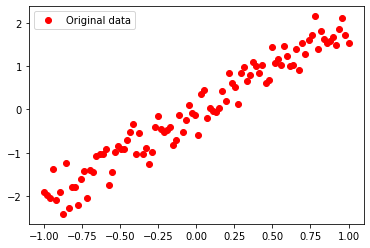

In [75]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.legend()
plt.show()

tf.reset_default_graph()

In [76]:
# Creating a model
X = tf.placeholder('float')
Y = tf.placeholder('float')

# Model parameters
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1], name='bias'))

In [77]:
z = tf.multiply(X, W) + b
tf.summary.histogram('z', z)

<tf.Tensor 'z:0' shape=() dtype=string>

In [78]:
# Reverse optimization

# Cost function 
cost = tf.reduce_mean(tf.square(Y - z))
tf.summary.scalar('loss_function', cost)

# Gradient descent
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [79]:
# Start a session
init = tf.global_variables_initializer()
plot_data = {'batch_size': [], 'loss': []}
with tf.Session() as sess:
    sess.run(init)
    # Merge all summaries
    merged_summary_op = tf.summary.merge_all()
    # Create summary writer for the writing
    summary_writer = tf.summary.FileWriter(f'log/run-{time.time_ns()}', sess.graph)

    # Write data to the model
    training_epochs = 15
    display_step = 1
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            summary_str = sess.run(merged_summary_op, feed_dict={X: x, Y: y})
            summary_writer.add_summary(summary_str, epoch)

        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: x_train, Y: y_train})
            weights = sess.run(W)
            bias = sess.run(b)
            print(f"Epoch: {epoch + 1} cost={loss}, W={weights}, b={bias}")
            if loss:
                plot_data['batch_size'].append(epoch)
                plot_data['loss'].append(loss)

    print('Finished!')
    cost = sess.run(cost, feed_dict={X: x_train, Y: y_train})
    weights = sess.run(W)
    bias = sess.run(b)
    print(f"cost={cost}, W={weights}, b={bias}")



Epoch: 1 cost=0.6761869788169861, W=[0.85686857], b=[0.3010839]
Epoch: 2 cost=0.2646661400794983, W=[1.4089153], b=[0.17172804]
Epoch: 3 cost=0.13477975130081177, W=[1.7036897], b=[0.06931054]
Epoch: 4 cost=0.09865140914916992, W=[1.8554049], b=[0.01247872]
Epoch: 5 cost=0.08871055394411087, W=[1.932788], b=[-0.01703664]
Epoch: 6 cost=0.0858825296163559, W=[1.972168], b=[-0.03212516]
Epoch: 7 cost=0.08502337336540222, W=[1.9921979], b=[-0.03980839]
Epoch: 8 cost=0.08473645895719528, W=[2.0023818], b=[-0.04371615]
Epoch: 9 cost=0.08462931960821152, W=[2.0075612], b=[-0.0457036]
Epoch: 10 cost=0.08458487689495087, W=[2.0101936], b=[-0.04671377]
Epoch: 11 cost=0.08456484973430634, W=[2.0115335], b=[-0.0472279]
Epoch: 12 cost=0.08455535024404526, W=[2.012215], b=[-0.04748939]
Epoch: 13 cost=0.08455067873001099, W=[2.0125616], b=[-0.04762237]
Epoch: 14 cost=0.08454836905002594, W=[2.012737], b=[-0.04768987]
Epoch: 15 cost=0.08454719185829163, W=[2.0128262], b=[-0.04772415]
Finished!
cost=0.

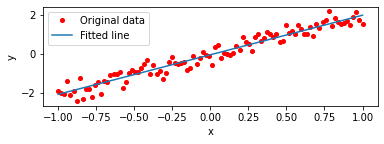

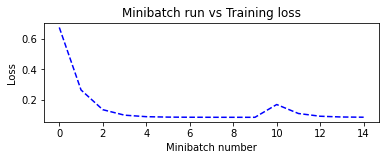

In [90]:
# Visualize results
y_pred = weights * x_train + bias
plot_data['avgloss'] = moving_average(plot_data['loss'])

plt.subplot(211)
plt.plot(x_train, y_train, 'ro', markersize=4, label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.subplot(212)
plt.plot(plot_data['batch_size'], plot_data['avgloss'], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs Training loss')

plt.show()

Now, in your terminal, type: `tensorboard --logdir log` and go to the given address. You can see your training log!

## Experiment 6

## Experiment 7

## Experiment 8

## Experiment 9